In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

/home/andrey/tensorflow/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(4.5,16,'$\\bf{AFTER}$\nprogram,\nmore children\nwere $\\it{Kind\\ of}$\n$\\it{interested\\ &}$\n$\\it{Excited}$ about\nscience.')

/home/andrey/tensorflow/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


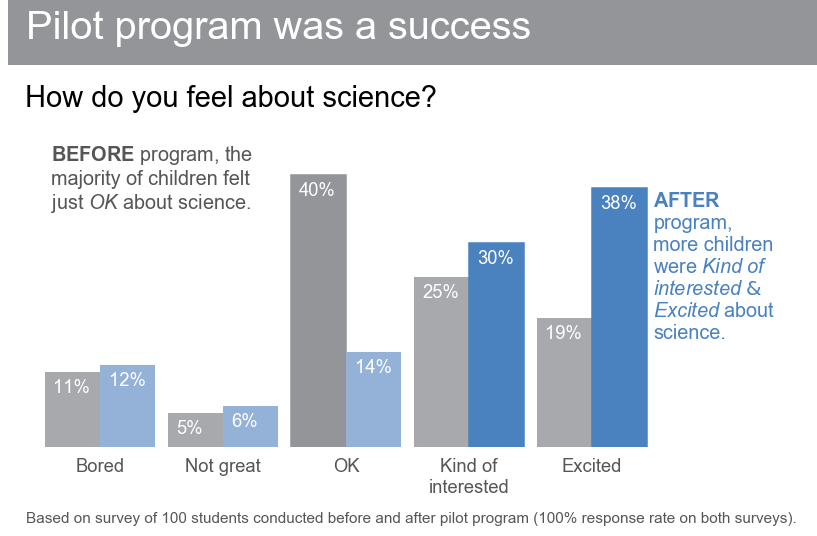

In [2]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

# survey responses
X = ['Bored', 'Not great', 'OK', 'Kind of\ninterested', 'Excited']
Y = [11, 5, 40, 25, 19] # responses distribution before the program
Z = [12, 6, 14, 30, 38] # responses distribution after the program

# create new figure
plt.figure(figsize=(8.2, 5), # width, height in inches
           dpi=110)          # resolution of the figure

# remove chart border
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# change the appearance of ticks, tick labels, and gridlines
plt.tick_params(bottom='off',     # don't draw buttom ticks
                left='off',       # don't draw left ticks
                labelleft='off',  # don't draw left tick labels
                labelbottom='on') # draw bottom tick labels

# tune the subplot layout by setting sides of the figure
plt.subplots_adjust(left=0, right=0.735, top=0.67, bottom=0.15)

# titile the plot
plt.text(-0.6, 60, # position in data coordinates
         'Pilot program was a success'+' '*25, 
         fontsize=26, 
         color='white', 
         # put a rectangular box around the text instance to set a background color
         bbox={'facecolor':'#939598', # set text background color to gray
               'pad':12,              # set amout of padding
               'edgecolor':'none'})   # no border

# subtitle the plot
plt.text(-0.61, 50, 'How do you feel about science?', fontsize=19)

# add footnote with the data source
plt.text(-0.6, -11, 
         'Based on survey of 100 students conducted '
         'before and after pilot program '
         '(100% response rate on both surveys).', 
         color='#555655')

# There is no automatic support of subcategories in matplotlib.
def subcategorybar(X,              # categories
                   vals,           # subcategories values
                   base_colors,    # base colors for subcategories
                   special_colors, # highlight colors for subcategories
                   special_bars,   # highlighted bars indicies for each subcategory
                   width=0.9):     # total subcategories bars width
    # how many subcategories do we have?
    n = len(vals)
    # give a number for each category
    _X = np.arange(len(X))    
    for i in range(n):
        # draw i-th subcategory bars
        bars = plt.bar(_X - width/2. + i/float(n)*width, # subcategory places
                       vals[i],                # subcategory values
                       width=width/float(n),   # the width of the bars
                       align="edge",           # aligns bars by their left edges
                       color=base_colors[i])   # use base color for subcategory
        
        # show values for each bar at top inside
        for bi, b in enumerate(bars):
            plt.text(b.get_x()+0.07, b.get_height()-3, # position in data coordinates
                     str(vals[i][bi])+ '%',            # text (subcategory value%)
                     fontsize=12,                      
                     color='white')
        # if there are any highlighted bars in subcategory, change their colors
        if special_bars[i] != None:
            for special_bar_i in special_bars[i]:
                bars[special_bar_i].set_color(special_colors[i]) # set bar color
    # set category tick locations and labels of the x-axis
    plt.xticks(_X, X)

# draw subcategorical vertical bar plot
subcategorybar(X,                      # categories
               [Y, Z],                 # subcategories values
               ['#A8A9AD', '#94B2D7'], # pale gray and pale blue colors
               ['#939598', '#4A81BF'], # bright gray and bright blue
               [[2], [3, 4]])          # highlight 3rd pre bar and 4th,5th post bar

# configure categories labels appearance
for item in plt.gca().get_xticklabels():
    item.set_fontsize(12)     # set font size
    item.set_color('#555655') # set color to gray
    
# add notes to plot
plt.text(-0.4, 35, 
         '$\\bf{BEFORE}$ program, the\n'       # use mathtext \\bf for bold text
         'majority of children felt\n' 
         'just $\\mathit{OK}$ about science.', # use mathtext \\mathit for italic text
         fontsize=13, 
         color='#555655')

# add notes to plot
plt.text(4.5, 16, 
         '$\\bf{AFTER}$\n'                     # use mathtext \\b for bold text
         'program,\n'
         'more children\n'
         'were $\\it{Kind\ of}$\n'             # use mathtext \\mathit for italic text
         '$\\it{interested\ &}$\n'
         '$\\it{Excited}$ about\n'
         'science.', 
         fontsize=13, 
         color='#4A81BF')